## 데이터 표현과 특성공학 1.0

- 데이터에는 연속형 특성과 범주형 특성이 있다
- 가장 적합한 데이터 표현을 찾는것을 특성공학이라 하며 이는 데이터를 정규화 하는 것만큼 중요하다
- 범주형 특성은 정성적인 속성을 가지고 있기에 바꿔줘야 한다.
    - pd.get_dummies(one-hot-encoding)이 있음
    - 더미즈 방식은 문자열을 스스로 인식하여 이를 원핫인코딩 방식으로 변경한다
    - 단 정성적인 속성의 숫자의 경우는 인지 못하기 때문에 이를 문자로 바꿔주거나 컬럼을 명시해야한다.
        - demo_df['char'].astype(str) : 칼럼타입을 문자열로 바꾸기
        - pd.get_dummied(demo_df, columns = ['char', 'series']) : 바꾸려는 칼럼을 명시하기
    - get_dummies 방식은 원핫인코딩을 하므로 기존의 문자열 칼럼 한개가, 해당 칼럼의 데이터 종류에 따라서 칼럼갯수가 증가됨.      

- 데이터 표현 방식에 따라서 같은 모델이어도 성능이 달라진다.
- 연속형 데이터에 아주 강력한 선형모델을 만드는 방법은 한 특성을 여러 특성으로 나누는 구간 분할이다.
- 구간을 표시하는 함수로는 np.digitize(X, bins)가 있다
    - 주어진 x를 bins에 맞춰서 구분한다(라벨링한다)
    - 더 다양한 조건을 사용하고 싶으면 np.where가 있다.
- 이렇게 구분된(라벨링된) 특성에 onehotEncoder를 통해서 바꿔준다
    - onehotEncoder는 숫자로 된 범주형 변수만 적용이 가능하다.
- 구분지어진 데이터 셋에 대해서 결정트리 / 선형 회귀 두개 모두 완전히 일치하는 모습을 보인다
- 구분이 지어지면 선형회귀는 매우 유연해지나 결정트리는 그렇지 아니하다
- 이는 애초에 결정트리는 예측을 위해 가장 좋은 구간을 학습한다고 볼 수 있다.

## 이번장 중요표현

1. .astype(str) : 타입을 변경한다. / 앞에 뭐가 오는지 알아보자
2. df.loc[:, 'age':'str'] : loc을 단순히 인덱스 뿐만 아니라 칼럼의 범위까지 줄 수 있다
3. df.values : 데이터 프레임의 값들만을 nd.array로 뽑아낸다.
4. np.digitize(X, bins) : X를 주어진 구간 bins의 맞춰서 구분짓는다(라벨링한다)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
import seaborn as sns

In [2]:
import os

In [3]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
                  header = None, index_col = False,
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])


In [4]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [5]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [6]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [11]:
print ('original character: \n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)

original character: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 



In [8]:
print ('after get_dummies :\n', list(data.dummies.columns))

after get_dummies :
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Prote

In [12]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

In [18]:
X

array([[39, 40,  0, ...,  0,  0,  0],
       [50, 13,  0, ...,  0,  0,  0],
       [38, 40,  0, ...,  0,  0,  0],
       ..., 
       [58, 40,  0, ...,  0,  0,  0],
       [22, 20,  0, ...,  0,  0,  0],
       [52, 40,  0, ...,  0,  0,  0]], dtype=int64)

In [21]:
print ('X shape: {}, y shape{}'.format(X.shape, y.shape))

X shape: (32561, 44), y shape(32561,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print ('test score {:.2f}'.format(logreg.score(X_test, y_test)))

test score 0.81


In [23]:
demo_df = pd.DataFrame({'char' : [0,1,2,3], 'series' : ['socks', 'fox', 'socks', 'box']})

In [24]:
demo_df

,char,series
0,0,socks
1,1,fox
2,2,socks
3,3,box


In [26]:
pd.get_dummies(demo_df)

,char,series_box,series_fox,series_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0


In [29]:
demo_df['char'] =demo_df['char'].astype(str)

In [34]:
pd.get_dummies(demo_df, columns = ['char', 'series'])

,char_0,char_1,char_2,char_3,series_box,series_fox,series_socks
0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0


In [36]:
pd.get_dummies(demo_df)

,char_0,char_1,char_2,char_3,series_box,series_fox,series_socks
0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [38]:
X, y= mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

In [41]:
np.linspace(-3, 3, 1000).shape

(1000,)

In [42]:
line.shape

(1000, 1)

In [45]:
np.arange(3, 10).reshape(-1,1)

array([[3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [50]:
X.shape

(100, 1)

In [52]:
y.shape

(100,)

In [54]:
reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
reg.predict(line).shape

(1000,)

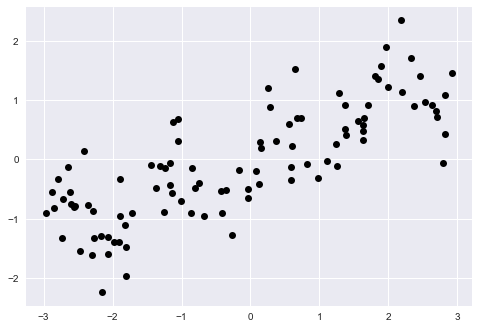

In [55]:
plt.plot(X[:, 0], y, 'o', c='k')

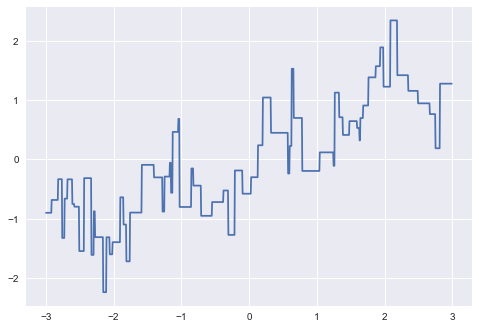

In [56]:
plt.plot(line, reg.predict(line), label = 'decision tree')

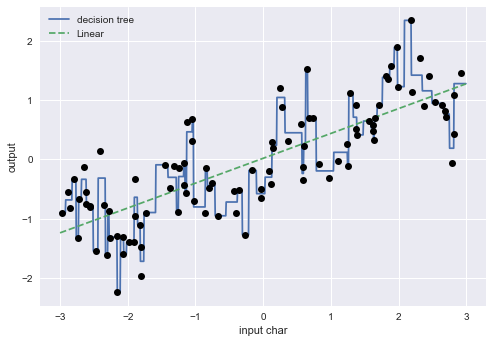

In [49]:
reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = 'decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = 'Linear')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('output')
plt.xlabel('input char')
plt.legend(loc ='best')

In [63]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(X, bins = bins)
print ('\n 데이터 포인트 : \n', X[:5])
print ('\n 데이터 포인트의 소속구간 "\n', which_bin[:5])


 데이터 포인트 : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 데이터 포인트의 소속구간 "
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [91]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
encoder.fit(which_bin)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [92]:
X_binned = encoder.transform(which_bin)

In [93]:
print (X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


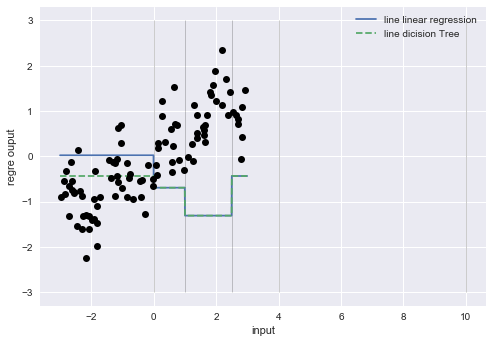

In [94]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'line linear regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = 'line dicision Tree')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(bins, -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = 'best')
plt.ylabel('regre ouput')
plt.xlabel('input')

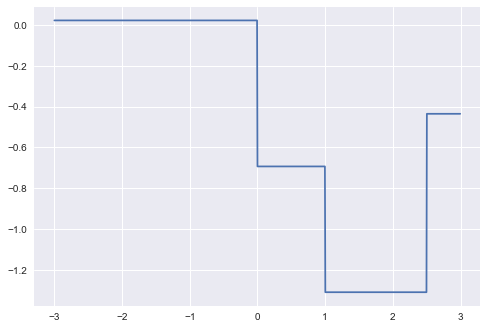

In [87]:
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'line linear regression')


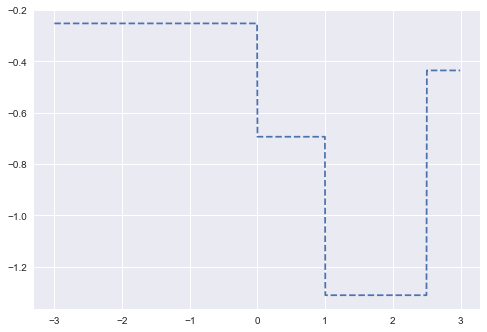

In [88]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = 'line dicision Tree')